In [1]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets,layers,models
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout 
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow import keras



In [9]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Pothole detection/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/Pothole detection/test'

In [3]:
import cv2

In [4]:
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img

In [10]:
import tensorflow as tf

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                                                                                   
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.2, 
                                                           horizontal_flip=True,
                                                           validation_split = 0.25
                                                            )
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,
                                                          validation_split = 0.25
                                                          )

In [13]:
train_data = train_gen.flow_from_directory(train_path,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           batch_size = 32,
                                           classes = ["Normal","potholes"],
                                           seed = 42,
                                           subset = "training"                                           
                                           )
test_data = test_gen.flow_from_directory(test_path,
                                         target_size = (224,224),
                                         class_mode = "categorical",
                                         classes = ["Normal","potholes"],
                                         batch_size = 32,
                                         seed = 42,
                                         subset = "validation"
                                         )

Found 1841 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [14]:
class_labels = list(train_data.class_indices.keys())

class_labels

['Normal', 'potholes']

In [15]:
image,label = train_data.next()
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 2)


In [16]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
                             layers.Conv2D(filters=64, kernel_size= 2, activation="relu", input_shape=(224,224,3)),
                             layers.MaxPooling2D(pool_size= 2),

                             layers.Conv2D(filters= 64, kernel_size= 2, activation="relu"),
                             layers.MaxPooling2D(pool_size= 2),

                             layers.Conv2D(filters= 64, kernel_size= 2, activation= "relu"),
                             layers.MaxPooling2D(pool_size = 2),


                             layers.Flatten(),

                             layers.Dense(128, activation= "relu"),
                             layers.Dropout(0.5),
                             layers.Dense(2, activation="softmax"),
])

In [17]:
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [18]:
model.fit(train_data,
          epochs = 10,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/10
58/58 [==============================] - 468s 8s/step - loss: 0.5346 - accuracy: 0.7404 - val_loss: 0.1783 - val_accuracy: 0.9091
Epoch 2/10
58/58 [==============================] - 41s 709ms/step - loss: 0.3804 - accuracy: 0.8441 - val_loss: 0.0944 - val_accuracy: 0.9545
Epoch 3/10
58/58 [==============================] - 42s 716ms/step - loss: 0.3185 - accuracy: 0.8745 - val_loss: 0.0611 - val_accuracy: 1.0000
Epoch 4/10
58/58 [==============================] - 41s 712ms/step - loss: 0.2751 - accuracy: 0.8963 - val_loss: 0.2215 - val_accuracy: 0.8636
Epoch 5/10
58/58 [==============================] - 42s 716ms/step - loss: 0.2950 - accuracy: 0.8800 - val_loss: 0.0638 - val_accuracy: 1.0000
Epoch 6/10
58/58 [==============================] - 41s 711ms/step - loss: 0.2816 - accuracy: 0.8946 - val_loss: 0.1054 - val_accuracy: 0.9091
Epoch 7/10
58/58 [==============================] - 41s 710ms/step - loss: 0.2804 - accuracy: 0.8995 - val_loss: 0.0403 - val_accuracy: 1.0000
E

In [19]:
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


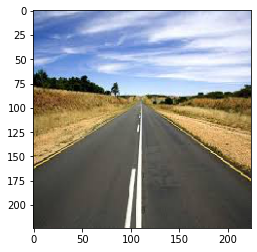

Normal


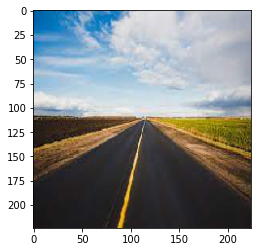

Normal


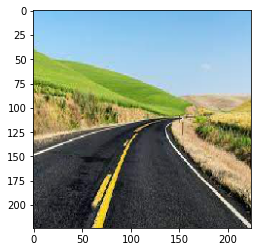

Normal


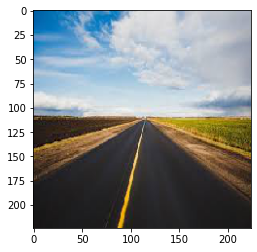

Normal


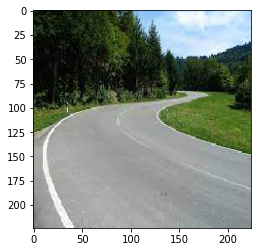

Normal


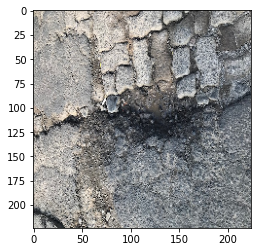

Potholes


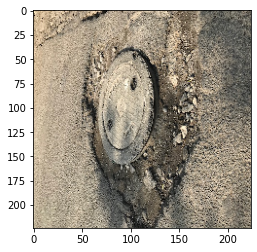

Potholes


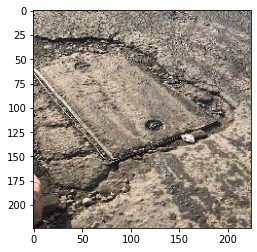

Potholes


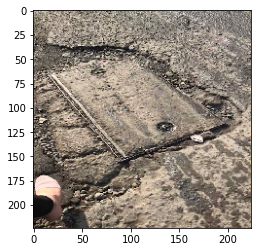

Potholes


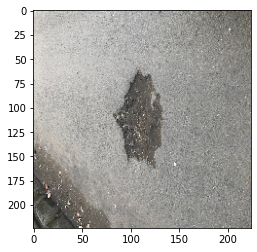

Potholes


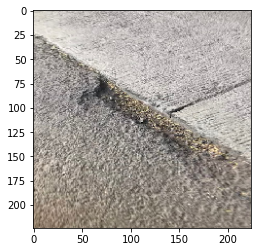

Potholes


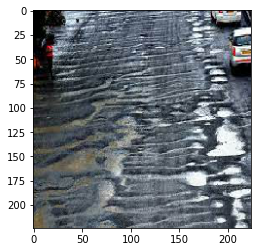

Potholes


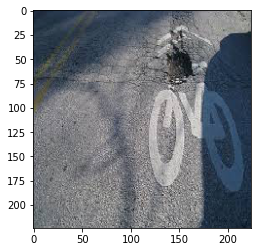

Potholes


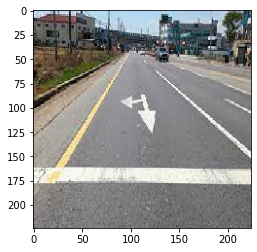

Normal


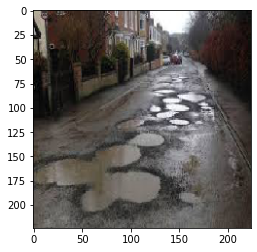

Potholes


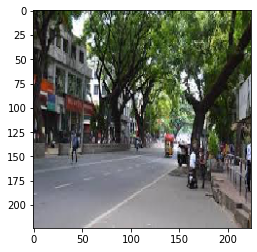

Normal


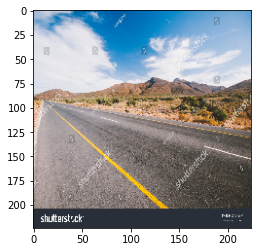

Normal


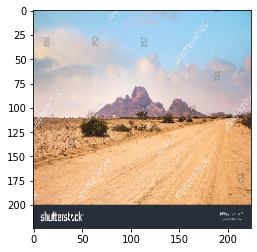

Normal


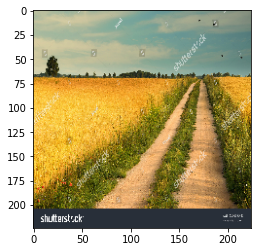

Normal


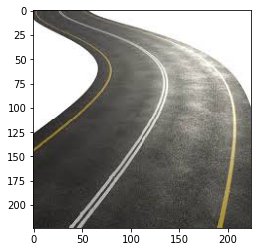

Normal


In [28]:
import os
from keras.preprocessing import image
dir_path='/content/drive/MyDrive/Colab Notebooks/Pothole detection/Validation'
for i in os.listdir(dir_path):
   img=image.load_img(dir_path+'//'+i,target_size=(224,224))
   plt.imshow(img)
   plt.show()
   X=image.img_to_array(img)
   X=np.expand_dims(X,axis=0)
   images=np.vstack([X])
   val=model.predict(images)
   if val[0][0]<0.5:
        print("Potholes")
   else:
        print("Normal")